# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



### Data Cleaning

In [229]:
#READING DATA
data = pd.read_csv("hour.csv")

In [230]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [231]:
#DROPPING UNNECESSARY COLUMNS

data = data.drop(columns=["instant"])

In [232]:
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [233]:
#CREATING NEW FEATURES 
data["ratio_casual"] = round((data.casual / data.cnt),2)
data["ratio_registered"] = round((data.registered/data.cnt),2)

In [234]:
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.19,0.81
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.20,0.80
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.16,0.84
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.23,0.77
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.00,1.00


In [ ]:
#CHANGING OUR INDEX TO HOURLY GRANULARITY 

#convert column dteday to datetime dtype
data.dteday = pd.to_datetime(data.dteday, format = '%Y-%m-%d')

#Combine 'dteday' and 'hr' into a single datetime column for hourly periods
data['datetime'] = data['dteday'] + pd.to_timedelta(data['hr'], unit='h')

#Set the new datetime column as the index
data.set_index('datetime', inplace=True)

#drop dteday column
data = data.drop(columns=["dteday"], axis = 1)


In [236]:
data.sort_index()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.19,0.81
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.20,0.80
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.16,0.84
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.23,0.77
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0.09,0.91
2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0.09,0.91
2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0.08,0.92


In [237]:
data.index = data.index.to_period("H")

In [ ]:
#CHECKING FOR NULLS
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 17379 entries, 2011-01-01 00:00 to 2012-12-31 23:00
Freq: H
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17379 non-null  int64  
 1   yr                17379 non-null  int64  
 2   mnth              17379 non-null  int64  
 3   hr                17379 non-null  int64  
 4   holiday           17379 non-null  int64  
 5   weekday           17379 non-null  int64  
 6   workingday        17379 non-null  int64  
 7   weathersit        17379 non-null  int64  
 8   temp              17379 non-null  float64
 9   atemp             17379 non-null  float64
 10  hum               17379 non-null  float64
 11  windspeed         17379 non-null  float64
 12  casual            17379 non-null  int64  
 13  registered        17379 non-null  int64  
 14  cnt               17379 non-null  int64  
 15  ratio_casual      17379 non-null  float64
 16  ratio

In [240]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.172099,0.827901
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.136588,0.136588
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.060000,0.750000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.150000,0.850000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.250000,0.940000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000


In [ ]:
#CHECKING FOR DUPLICATE ENTRIES
data.duplicated().sum()

2

In [255]:
data.shape

(17379, 18)

In [ ]:
#REMOVING DUPLICATES
data = data.drop_duplicates()

In [257]:
data.shape

(17377, 18)

In [241]:
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'ratio_casual', 'ratio_registered'],
      dtype='object')>

In [245]:
#CHECKING FOR CONSISTENCY IN SUMS 
data["diff"] = data.cnt - (data.casual + data.registered)

In [246]:
data["diff"].value_counts()

diff
0    17379
Name: count, dtype: int64

In [274]:
data = data.drop(columns=["diff"])

In [276]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.19,0.81
2011-01-01 01:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.20,0.80
2011-01-01 02:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.16,0.84
2011-01-01 03:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.23,0.77
2011-01-01 04:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.00,1.00


### Visualizations

In [242]:
categorical_columns = data.select_dtypes(["O", "int"]).columns
numerical_columns = data.select_dtypes(["float"]).columns

<Axes: >

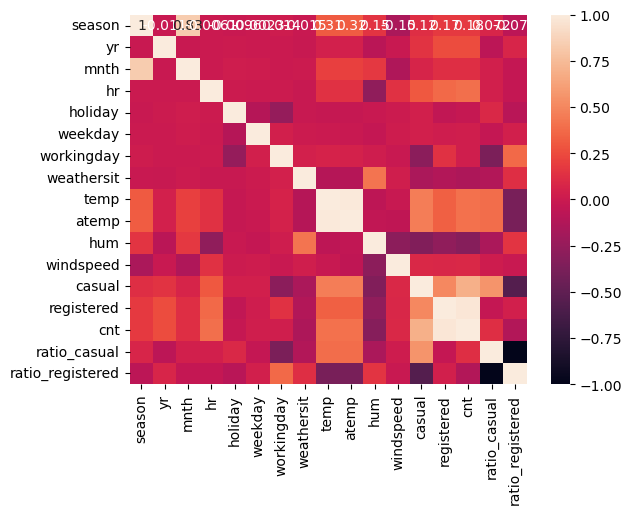

In [243]:
sns.heatmap(data.corr(), annot = True)

Text(0, 0.5, 'Bike Rentals')

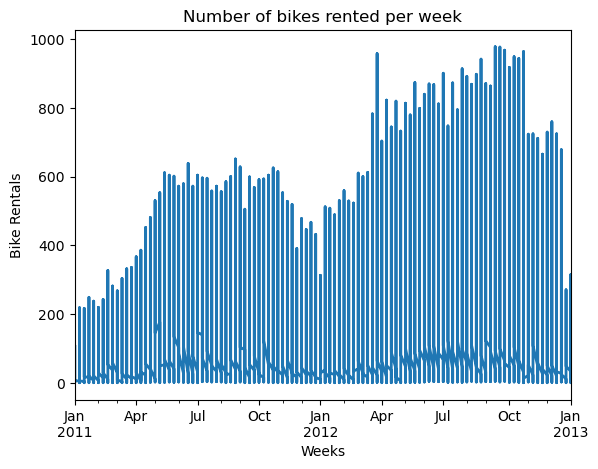

In [ ]:
#WEEKLY CNT
data['cnt'].asfreq('w').plot(linewidth = 2)
plt.title('Number of bikes rented per week')
plt.xlabel('Weeks')
plt.ylabel('Bike Rentals')

In [ ]:
#COUNT PER WEEKDAY
weekday_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
               4: "Friday", 5: "Saturday", 6: "Sunday"}

# Create a copy of the relevant columns to avoid modifying the original DataFrame
data_plot = data[['weekday', 'cnt']].copy()

# Map integers to weekday names if `weekday` is in integer format
data_plot['weekday'] = data_plot['weekday'].map(weekday_map)

# Aggregate by weekday
data_plot = data_plot.groupby(['weekday']).sum().reset_index()

# Sort by the correct day order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_plot = data_plot.set_index("weekday").loc[day_order].reset_index()

# Create the bar plot
fig = px.bar(data_plot, x='weekday', y='cnt', title='Total Count by Day of Week')
fig.show()

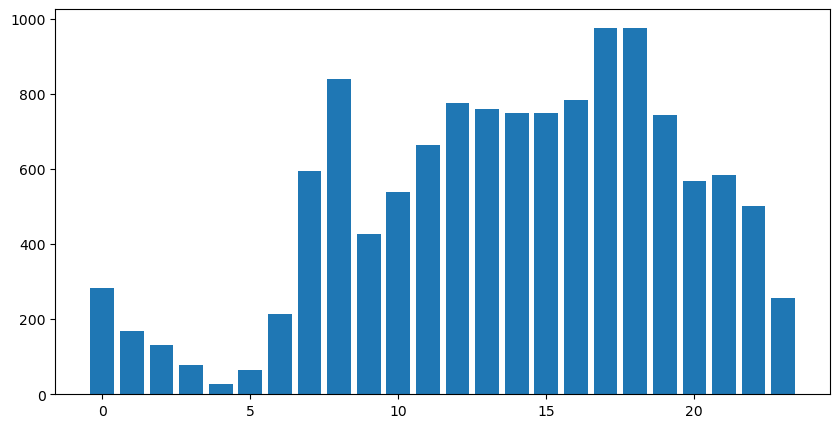

In [ ]:
#CHECKING HOURLY USAGE
fig = plt.figure(figsize = (10, 5))
plt.bar(data['hr'],data['cnt'])
plt.show()

In [266]:
#CHECKING CASUAL VS REGISTERED MONTHLY

months2011 = data.mnth[(data.yr == 0)].unique()
months2012 = data.mnth[(data.yr == 1)].unique()  

casual_counts2011 = data[(data.yr == 0)].groupby('mnth')['casual'].sum()
registered_counts2011 = data[(data.yr == 0)].groupby('mnth')['registered'].sum()

casual_counts2012 = data[(data.yr == 1)].groupby('mnth')['casual'].sum()
registered_counts2012 = data[(data.yr == 1)].groupby('mnth')['registered'].sum()

<Axes: >

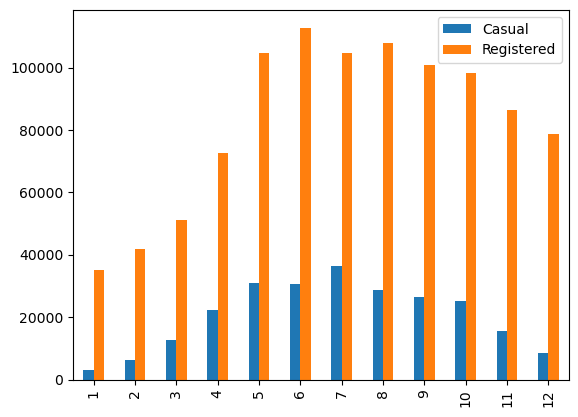

In [267]:
#CASUAL VS REGISTERED MONTHLY 2011
stacked = pd.DataFrame({'Casual': casual_counts2011, 'Registered': registered_counts2011}, index=months2011)
stacked.plot(kind='bar')

<Axes: >

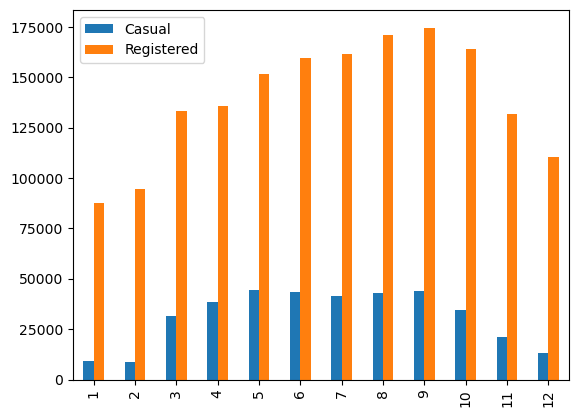

In [268]:
#CASUAL VS REGISTERED MONTHLY 2012
stacked = pd.DataFrame({'Casual': casual_counts2012, 'Registered': registered_counts2012}, index=months2012)
stacked.plot(kind='bar')

c:\Users\frida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cnt', ylabel='Count'>

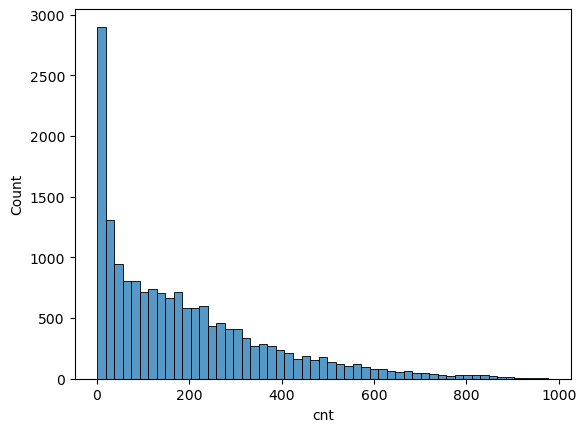

In [272]:
#DISTRIBUTION OF COUNT
sns.histplot(data['cnt'])

### Dataset for KPIs

In [277]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.19,0.81
2011-01-01 01:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.20,0.80
2011-01-01 02:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.16,0.84
2011-01-01 03:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.23,0.77
2011-01-01 04:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.00,1.00


In [278]:
data["total_bikes"] = 1000

In [279]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered,total_bikes
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.19,0.81,1000
2011-01-01 01:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.20,0.80,1000
2011-01-01 02:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.16,0.84,1000
2011-01-01 03:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.23,0.77,1000
2011-01-01 04:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.00,1.00,1000


In [285]:
data["occ_rate"] = (data.cnt/ data.total_bikes)

In [286]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual,ratio_registered,total_bikes,occ_rate
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.19,0.81,1000,0.016
2011-01-01 01:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.20,0.80,1000,0.040
2011-01-01 02:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.16,0.84,1000,0.032
2011-01-01 03:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.23,0.77,1000,0.013
2011-01-01 04:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.00,1.00,1000,0.001


## PART II: Prediction Model

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###